# Introduction

This notebook provides an analysis of projected climate data for the United Kingdom from 2024 to 2098. It focuses on three key meteorological variables: temperature, rainfall, and wind speed. 

The dataset, which is based on climate projections, captures monthly trends and variations over an extended timeline. This analysis offers insights into how these environmental factors may evolve as a result of climate change.


This is the first step in the sonification project. The data will be cleaned and prepared for use in SuperCollider.


The workflow includes preprocessing raw data, converting temperature readings from Kelvin to Celsius, visualizing long-term changes, and saving the new data to a new CSV file.

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [33]:
# Adjust the relative path to the correct location
notebook_dir = os.getcwd()
temp_path = os.path.join(notebook_dir, '..', 'data_analysis', 'temperature.csv')

# Skip metadata rows and read the data
temp_df = pd.read_csv(
    temp_path, 
    skiprows=52,  # Skip rows up to the actual data header 
    sep=',',      # Specify the correct delimiter (comma in this case)
    engine='python',  # Use Python engine for flexible parsing
    on_bad_lines='skip'  # Skip any problematic rows
)

temp_df

,Date,AL,AT,BA,BE,BG,CH,CY,CZ,DE,...,NO,PL,PT,RO,RS,SE,SI,SK,TR,UK
0,1970-01-31,275.844828,265.209943,272.837592,271.712767,273.944403,264.708751,283.673541,266.553520,267.655611,...,265.887292,267.571375,280.541514,272.339905,273.688638,265.357922,269.534278,268.871963,273.227737,276.572673
1,1970-02-28,274.993295,269.706637,274.258576,274.621716,274.703420,267.574540,282.261323,271.099277,271.983659,...,267.114784,271.928975,282.247834,273.082250,274.811916,266.700651,272.876084,271.573611,271.661870,276.605918
2,1970-03-31,276.740977,273.541633,275.477086,280.460677,276.142663,272.587608,284.101738,275.364104,277.891974,...,271.573371,275.450061,286.134134,275.611623,276.402060,271.871123,276.630945,274.765148,276.228129,280.278043
3,1970-04-30,284.884881,279.823551,284.455268,285.125126,285.071800,277.849027,288.162090,283.254995,284.407149,...,275.096578,283.463870,285.435014,284.666201,285.934205,276.671030,284.162039,283.086236,282.232320,281.647203
4,1970-05-31,287.763929,283.570479,286.649250,287.254891,287.741816,282.029156,292.592642,286.874938,287.814017,...,279.749215,286.557383,288.489598,287.234617,288.662066,281.940927,287.541788,286.314767,286.295354,283.486842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,2098-08-31,302.293870,294.509723,299.820715,294.523699,301.065517,294.173843,307.472484,294.511068,294.688563,...,289.725799,293.307918,300.783392,298.812129,300.411482,290.804283,298.663232,295.192379,302.992737,292.090237
1544,2098-09-30,296.664774,289.515088,293.546205,291.996567,295.816236,288.754067,304.947392,289.840293,290.800059,...,285.926437,289.828494,299.985354,292.551930,294.288252,286.946669,293.196375,290.215089,298.758743,290.784606
1545,2098-10-31,292.959629,286.290727,289.880660,289.509916,289.905691,285.466037,300.707999,287.556829,288.598764,...,282.509708,287.019876,297.528128,287.878582,290.097115,283.196183,289.166891,286.693151,292.528705,288.767088
1546,2098-11-30,285.104485,277.006020,281.709599,279.486172,282.166540,276.421482,295.873774,278.375501,278.742816,...,273.553538,278.152446,291.285559,279.554202,281.478546,274.154587,280.069983,278.521267,286.808380,281.167716


In [34]:
# Ensure 'Date' is parsed as a datetime column
temp_df['Date'] = pd.to_datetime(temp_df['Date'])

In [35]:
# Extract the year and month from 'Date'
temp_df['Year'] = temp_df['Date'].dt.to_period('M')

# Filter rows between 2024 and 2098
temp_pred = temp_df[temp_df['Year'] >= '2024-01']

In [36]:
# Select only 'YearMonth' and 'UK' columns
# Make a copy to avoid SettingWithCopyWarning
temp_uk = temp_pred[['Year', 'UK']].copy()

temp_uk

,Year,UK
648,2024-01,278.318442
649,2024-02,279.679320
650,2024-03,281.119786
651,2024-04,281.463725
652,2024-05,283.513798
...,...,...
1543,2098-08,292.090237
1544,2098-09,290.784606
1545,2098-10,288.767088
1546,2098-11,281.167716


In [37]:
# Convert temperature from Kelvin to Celsius without decimal points
temp_uk['Temperature'] = (temp_uk['UK'] - 273.15)

temp_uk

,Year,UK,Temperature
648,2024-01,278.318442,5.168442
649,2024-02,279.679320,6.529320
650,2024-03,281.119786,7.969786
651,2024-04,281.463725,8.313725
652,2024-05,283.513798,10.363798
...,...,...,...
1543,2098-08,292.090237,18.940237
1544,2098-09,290.784606,17.634606
1545,2098-10,288.767088,15.617088
1546,2098-11,281.167716,8.017716


In [38]:
# Drop the original 'UK' column as is no longer needed
temp_uk = temp_uk.drop(columns=['UK'])

In [39]:
# Check for missing values in the DataFrame
temp_uk.isnull().sum()

Year           0
Temperature    0
dtype: int64

In [40]:
# Normalize  using min-max scaling
temp_uk['Temperature_Normalized'] = (temp_uk['Temperature'] - np.min(temp_uk['Temperature'])) / (np.max(temp_uk['Temperature']) - np.min(temp_uk['Temperature']))

temp_uk

,Year,Temperature,Temperature_Normalized
648,2024-01,5.168442,0.218726
649,2024-02,6.529320,0.285347
650,2024-03,7.969786,0.355865
651,2024-04,8.313725,0.372702
652,2024-05,10.363798,0.473063
...,...,...,...
1543,2098-08,18.940237,0.892921
1544,2098-09,17.634606,0.829004
1545,2098-10,15.617088,0.730237
1546,2098-11,8.017716,0.358211


In [41]:
# For clarification, drop the original 'Temperature' column and rename 'Temperature_Normalized' to 'Temperature'
temp_uk = temp_uk.drop(columns=['Temperature'])
temp_uk.rename(columns={'Temperature_Normalized': 'Temperature'}, inplace=True)

temp_uk

,Year,Temperature
648,2024-01,0.218726
649,2024-02,0.285347
650,2024-03,0.355865
651,2024-04,0.372702
652,2024-05,0.473063
...,...,...
1543,2098-08,0.892921
1544,2098-09,0.829004
1545,2098-10,0.730237
1546,2098-11,0.358211


Uncomment to save as a new file

In [42]:
# np.savetxt("temperature_values.csv", temp_uk['Temperature'].values, delimiter=",", fmt="%.2f", header="Temperature", comments="")

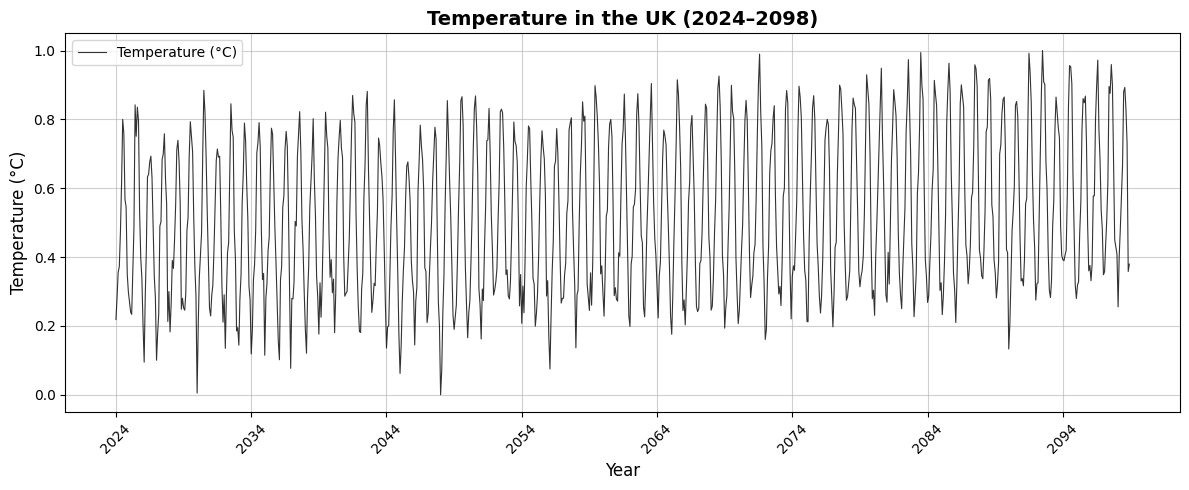

In [43]:
# Plotting the temperature data
plt.figure(figsize=(12, 5))

# Convert 'Year' to datetime for plotting
temp_uk['Year'] = temp_uk['Year'].dt.to_timestamp()

plt.plot(temp_uk['Year'], temp_uk['Temperature'], label='Temperature (°C)', color='black', linewidth=0.8, alpha=0.8)

# Plot only every 10th year 
decades = pd.date_range(start=temp_uk['Year'].min(), end=temp_uk['Year'].max(), freq='10YS')
plt.xticks(decades, [d.year for d in decades], rotation=45)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Temperature in the UK (2024–2098)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()


The plot shows a steady and consistent increase in average monthly temperatures throughout the dataset. 

While seasonal fluctuations are still apparent, showing warmer summers and cooler winters, the overall baseline temperature is clearly rising over time. 

This trend aligns with global climate models that predict ongoing warming driven by greenhouse gas emissions.

# Rain

In [44]:
# Adjust the relative path to the correct location
notebook_dir = os.getcwd()
rain_path = os.path.join(notebook_dir, '..', 'data_analysis', 'rain.csv')

# Skip metadata rows and read the data
rain_df = pd.read_csv(
    rain_path, 
    skiprows=52,  # Skip rows up to the actual data header 
    sep=',',      # Specify the correct delimiter (comma in this case)
    engine='python',  # Use Python engine for flexible parsing
    on_bad_lines='skip'  # Skip any problematic rows
)

rain_df.head()

,Date,AL,AT,BA,BE,BG,CH,CY,CZ,DE,...,NO,PL,PT,RO,RS,SE,SI,SK,TR,UK
0,1970-01-31,0.102987,0.040859,0.110951,0.019889,0.027872,0.056352,0.044604,0.016519,0.014737,...,0.126559,0.018551,0.135261,0.043586,0.047650,0.037625,0.128767,0.047397,0.049972,0.096121
1,1970-02-28,0.145762,0.079290,0.080542,0.060157,0.037311,0.128630,0.025560,0.052590,0.052911,...,0.088117,0.046426,0.052006,0.036887,0.042874,0.038868,0.075313,0.047363,0.056213,0.075361
2,1970-03-31,0.053327,0.095198,0.043193,0.057971,0.048398,0.108462,0.116621,0.053577,0.070334,...,0.125401,0.057576,0.020463,0.052975,0.053031,0.047420,0.007280,0.036553,0.125981,0.109952
3,1970-04-30,0.009653,0.030830,0.029149,0.065405,0.016689,0.053831,0.040317,0.015963,0.038655,...,0.088969,0.024292,0.056574,0.017864,0.013159,0.053568,0.053104,0.015857,0.046603,0.092313
4,1970-05-31,0.080940,0.063861,0.152486,0.072325,0.100689,0.071620,0.030480,0.036258,0.047643,...,0.089834,0.026943,0.078356,0.071609,0.088968,0.049397,0.082106,0.044542,0.101177,0.054328


In [45]:
# Ensure 'Date' is parsed as a datetime column
rain_df['Date'] = pd.to_datetime(rain_df['Date'])

In [46]:
# Extract the year and month from 'Date'
rain_df['Year'] = rain_df['Date'].dt.to_period('M')

# Filter rows between 2024 and 2098
rain_pred = rain_df[rain_df['Year'] >= '2024-01']

In [47]:
# Select only 'year and month' and 'UK' columns
rain_uk = rain_pred[['Year', 'UK']].copy()

rain_uk

,Year,UK
648,2024-01,0.112557
649,2024-02,0.111266
650,2024-03,0.084483
651,2024-04,0.071342
652,2024-05,0.073365
...,...,...
1543,2098-08,0.062422
1544,2098-09,0.080680
1545,2098-10,0.085424
1546,2098-11,0.048578


In [48]:
# Rename UK collumn to Rainfall(mm)
rain_uk.rename(columns={'UK':'Rainfall'}, inplace=True)

rain_uk

,Year,Rainfall
648,2024-01,0.112557
649,2024-02,0.111266
650,2024-03,0.084483
651,2024-04,0.071342
652,2024-05,0.073365
...,...,...
1543,2098-08,0.062422
1544,2098-09,0.080680
1545,2098-10,0.085424
1546,2098-11,0.048578


In [49]:
# Check for missing values 
rain_uk.isnull().sum()

Year        0
Rainfall    0
dtype: int64

In [50]:
# Normalize  using min-max scaling 
rain_uk['Rainfall_Normalized'] = (rain_uk['Rainfall'] - np.min(rain_uk['Rainfall'])) / (np.max(rain_uk['Rainfall']) - np.min(rain_uk['Rainfall']))

rain_uk

,Year,Rainfall,Rainfall_Normalized
648,2024-01,0.112557,0.537329
649,2024-02,0.111266,0.530677
650,2024-03,0.084483,0.392728
651,2024-04,0.071342,0.325045
652,2024-05,0.073365,0.335464
...,...,...,...
1543,2098-08,0.062422,0.279105
1544,2098-09,0.080680,0.373142
1545,2098-10,0.085424,0.397578
1546,2098-11,0.048578,0.207797


In [51]:
# For clarification, drop the original 'Rainfall' column and rename 'Rainfall_Normalized' to 'Rainfall'
rain_uk = rain_uk.drop(columns=['Rainfall'])
rain_uk.rename(columns={'Rainfall_Normalized': 'Rainfall'}, inplace=True)

rain_uk

,Year,Rainfall
648,2024-01,0.537329
649,2024-02,0.530677
650,2024-03,0.392728
651,2024-04,0.325045
652,2024-05,0.335464
...,...,...
1543,2098-08,0.279105
1544,2098-09,0.373142
1545,2098-10,0.397578
1546,2098-11,0.207797


Uncomment to save as a new file

In [52]:
# np.savetxt("rain_values.csv", rain_uk['Rainfall'].values, delimiter=",", fmt="%.2f", header="Rainfall", comments="")

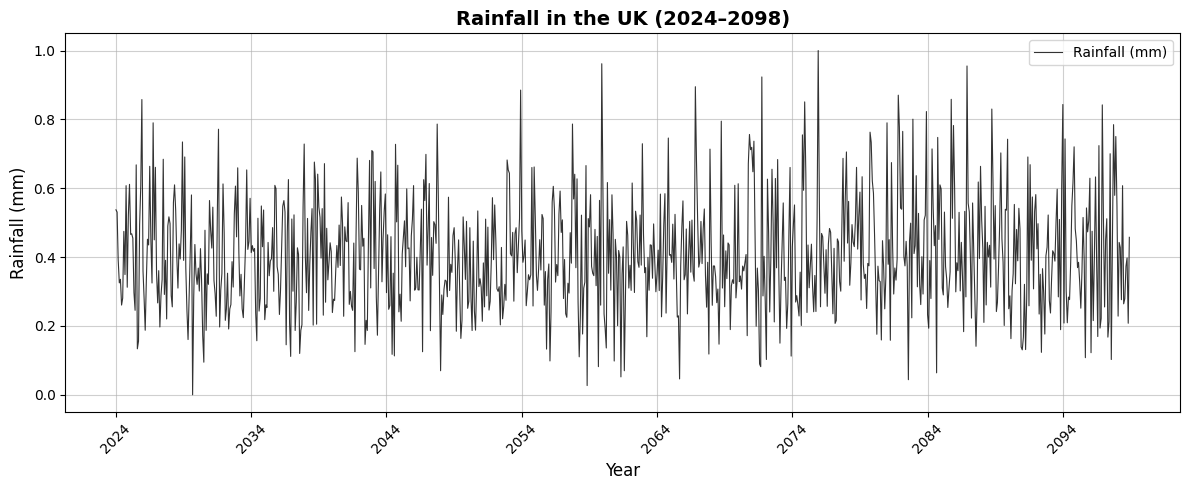

In [53]:
# Plotting the rainfall data
plt.figure(figsize=(12, 5))

# Convert 'Year' to datetime for plotting
rain_uk['Year'] = rain_uk['Year'].dt.to_timestamp()

plt.plot(rain_uk['Year'], rain_uk['Rainfall'], label='Rainfall (mm)', color='black', linewidth=0.8, alpha=0.8)

# Plot only every 10th year
decades = pd.date_range(start=rain_uk['Year'].min(), end=rain_uk['Year'].max(), freq='10YS')
plt.xticks(decades, [d.year for d in decades], rotation=45)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)
plt.title('Rainfall in the UK (2024–2098)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

The rainfall data demonstrates higher variability with a tendency toward more frequent and intense rainfall events. 

Some years show unusually high peaks, suggesting that while the average may not change drastically, extreme precipitation is becoming more common, which aligns with projections of more erratic weather.

# Wind

In [54]:
# Adjust the relative path to the correct location
notebook_dir = os.getcwd()
wind_path = os.path.join(notebook_dir, '..', 'data_analysis', 'wind.csv')

# Skip metadata rows and read the data
wind_df = pd.read_csv(
    wind_path, 
    skiprows=52,  # Skip rows up to the actual data header 
    sep=',',      # Specify the correct delimiter (comma in this case)
    engine='python',  # Use Python engine for flexible parsing
    on_bad_lines='skip'  # Skip any problematic rows
)

wind_df.head()

,Date,AL,AT,BA,BE,BG,CH,CY,CZ,DE,...,NO,PL,PT,RO,RS,SE,SI,SK,TR,UK
0,1970-01-31,3.292460,3.067706,3.514093,7.264985,4.008282,2.497843,4.784487,4.990453,5.571211,...,5.389368,6.595384,6.221041,3.878651,3.950602,6.842628,3.575754,4.049409,3.462267,8.804547
1,1970-02-28,2.945071,4.315683,3.546634,7.802187,4.516603,3.382486,5.106553,6.429431,6.779588,...,4.970756,7.296549,5.129361,4.633474,4.590922,6.069720,3.797686,5.092005,3.799174,9.017637
2,1970-03-31,3.146237,5.061073,3.814715,8.250199,5.340503,3.020532,4.540332,7.633236,7.901241,...,6.086881,7.834882,5.480768,5.373147,4.855241,6.726055,3.656997,5.561935,4.379079,10.376771
3,1970-04-30,2.768685,3.107613,3.283528,6.583819,4.321295,2.449880,3.846091,4.581221,4.933483,...,4.460902,5.110476,5.201301,4.195361,3.853665,5.516132,3.264880,3.644186,3.972214,7.377434
4,1970-05-31,2.710012,3.281568,3.135993,5.225507,4.218396,2.403673,3.779837,4.920610,4.854065,...,4.848910,5.670858,5.280556,4.813439,3.938056,5.547129,3.660583,4.411464,3.418150,6.080173


In [55]:
# Ensure 'Date' is parsed as a datetime column
wind_df['Date'] = pd.to_datetime(wind_df['Date'])

In [56]:

# Extract the year and month from 'Date'
wind_df['Year'] = wind_df['Date'].dt.to_period('M')

# Filter rows between 2024 and 2098
wind_pred = wind_df[wind_df['Year'] >= '2024-01']

In [57]:
# Select only 'year and month' and 'UK' columns
wind_uk = wind_pred[['Year', 'UK']].copy()

# Rename UK column to Wind
wind_uk.rename(columns={'UK':'Wind'}, inplace=True)

wind_uk

,Year,Wind
648,2024-01,9.584233
649,2024-02,11.651813
650,2024-03,9.543997
651,2024-04,6.454983
652,2024-05,6.892165
...,...,...
1543,2098-08,5.871070
1544,2098-09,7.582289
1545,2098-10,7.033441
1546,2098-11,6.125821


In [58]:
# Check for missing values 
wind_uk.isnull().sum()

Year    0
Wind    0
dtype: int64

In [59]:
# Normalize  using min-max scaling
wind_uk['Wind_Normalized'] = (wind_uk['Wind'] - np.min(wind_uk['Wind'])) / (np.max(wind_uk['Wind']) - np.min(wind_uk['Wind']))

wind_uk

,Year,Wind,Wind_Normalized
648,2024-01,9.584233,0.694231
649,2024-02,11.651813,0.988487
650,2024-03,9.543997,0.688505
651,2024-04,6.454983,0.248880
652,2024-05,6.892165,0.311099
...,...,...,...
1543,2098-08,5.871070,0.165778
1544,2098-09,7.582289,0.409317
1545,2098-10,7.033441,0.331205
1546,2098-11,6.125821,0.202034


In [60]:
# For clarification, drop the original 'Wind' column and rename 'Wind_Normalized' to 'Wind'
wind_uk = wind_uk.drop(columns=['Wind'])
wind_uk.rename(columns={'Wind_Normalized': 'Wind'}, inplace=True)

wind_uk

,Year,Wind
648,2024-01,0.694231
649,2024-02,0.988487
650,2024-03,0.688505
651,2024-04,0.248880
652,2024-05,0.311099
...,...,...
1543,2098-08,0.165778
1544,2098-09,0.409317
1545,2098-10,0.331205
1546,2098-11,0.202034


Uncomment to save as a new file

In [61]:
# np.savetxt("wind_values.csv", wind_uk['Wind'].values, delimiter=",", fmt="%.2f", header="Wind", comments="")

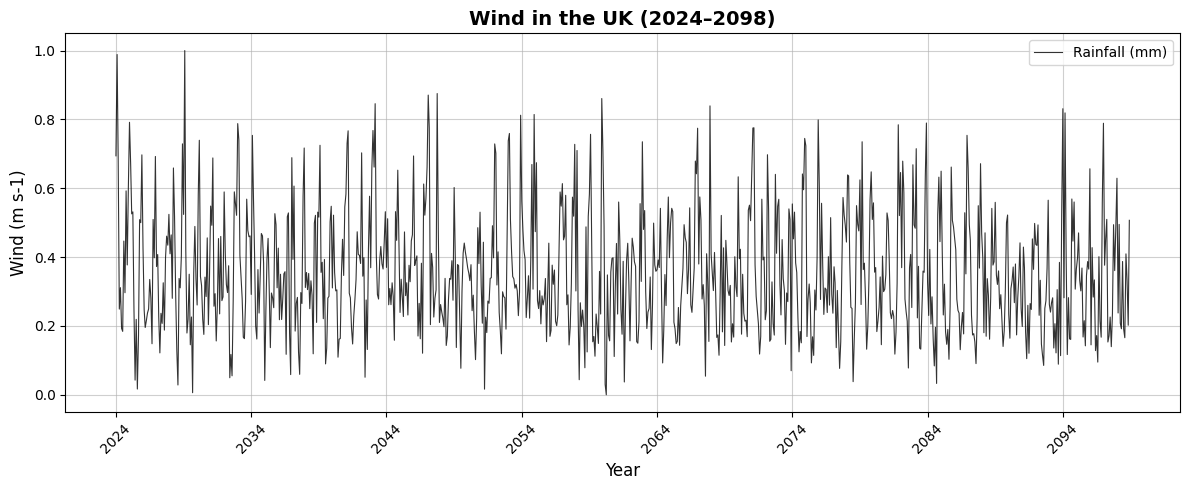

In [62]:
# Plotting the wind data
plt.figure(figsize=(12, 5))

# Convert 'Year' to datetime for plotting
wind_uk['Year'] = wind_uk['Year'].dt.to_timestamp()

plt.plot(wind_uk['Year'], wind_uk['Wind'], label='Rainfall (mm)', color='black', linewidth=0.8, alpha=0.8)

# Plot only every 10th year
decades = pd.date_range(start=wind_uk['Year'].min(), end=wind_uk['Year'].max(), freq='10YS')
plt.xticks(decades, [d.year for d in decades], rotation=45)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Wind (m s-1)', fontsize=12)
plt.title('Wind in the UK (2024–2098)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

The wind speed plots display subtle increases in variability, with certain periods showing stronger wind activity than usual. 

Though not as dramatic as the temperature or rainfall changes, this could indicate an increase in the intensity or frequency of storms and wind-related weather events over time.

### Transition to Sonification

To enhance public engagement and emphasize the urgency of these changes, we will now sonify this data, transforming it into sound, to create an immersive experience of climate change. 


This method enables us to perceive environmental shifts not just through visuals, but also emotionally, illustrating how climate change is affecting our atmosphere, not only in terms of statistics, but through sound as well.